In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
#kaggleからTitanic号のデータを予めDLしておき、読み込む
titanic_df = pd.read_csv('titanic_train.csv')

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#データの概要を見る
itanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


このデータから有用な知見を得るために、明確な目標があったほうが良いでしょう。いくつか、具体的な問いを設定してみます。

    1.) タイタニック号の乗客はどのような人達だったのか？
    2.) それぞれの乗客はどのデッキにいたか？また、それは客室の種類とどのような関係にあったか？
    3.) 乗客は主にどこから来たのか？
    4.) 家族連れか、単身者か？
    
これらの基本的な問いの後に、さらに深くデータ解析を進めます。

    5.) 沈没からの生還者には、どのような要因があったのか？

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

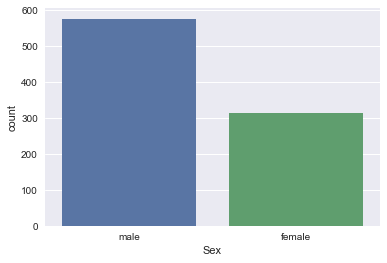

In [9]:
sns.countplot('Sex',data=titanic_df)

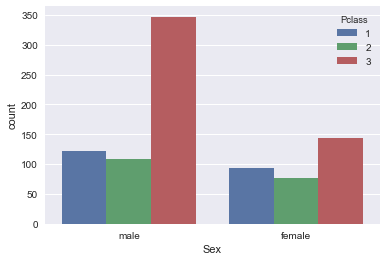

In [10]:
sns.countplot('Sex', data=titanic_df, hue='Pclass')

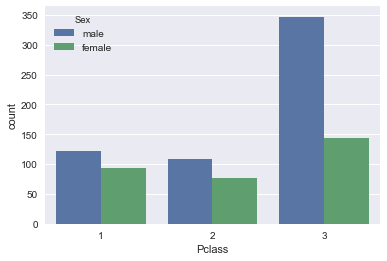

In [11]:
sns.countplot('Pclass', data=titanic_df, hue='Sex')

In [15]:
#年齢を基準に子どものセグメントをつくる
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [16]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


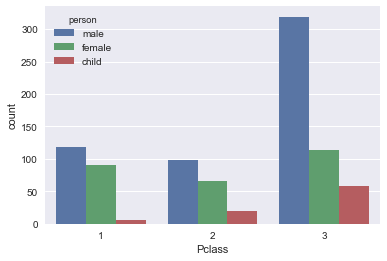

In [17]:
sns.countplot('Pclass', data=titanic_df, hue='person')

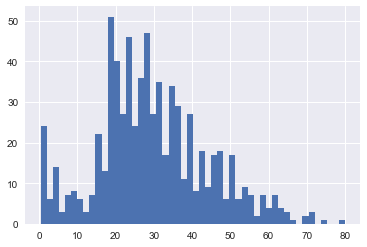

In [22]:
#binsは区間の数
titanic_df['Age'].hist(bins=50)

In [23]:
titanic_df['Age'].mean()

29.69911764705882

In [24]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

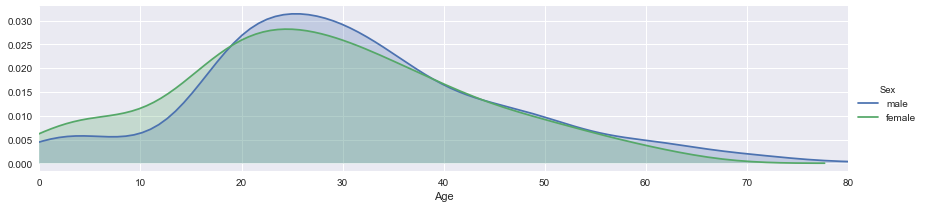

In [27]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)  #複数の要素をプロットする。aspectで横幅を指定。
fig.map(sns.kdeplot, 'Age', shade=True)  #カーネル密度推定で年齢の分布を推定。影をつける。
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))  #年齢の分布なのにマイナスや100以上の値が出るのを防ぐため、最小値と最大値を限定する
fig.add_legend()  #凡例をつける

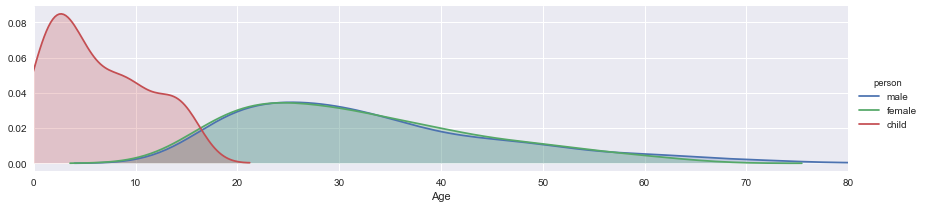

In [28]:
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)  #複数の要素をプロットする。aspectで横幅を指定。
fig.map(sns.kdeplot, 'Age', shade=True)  #カーネル密度推定で年齢の分布を推定。影をつける。
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))  #年齢の分布なのにマイナスや100以上の値が出るのを防ぐため、最小値と最大値を限定する
fig.add_legend()  #凡例をつける

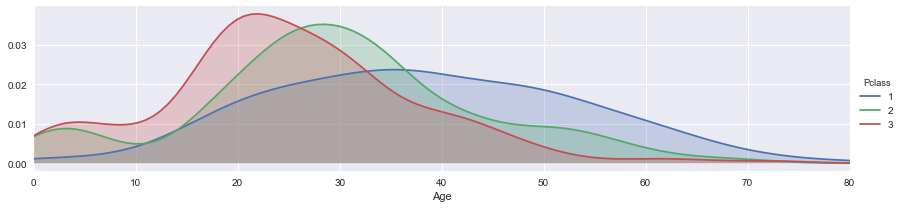

In [29]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)  #複数の要素をプロットする。aspectで横幅を指定。
fig.map(sns.kdeplot, 'Age', shade=True)  #カーネル密度推定で年齢の分布を推定。影をつける。
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))  #年齢の分布なのにマイナスや100以上の値が出るのを防ぐため、最小値と最大値を限定する
fig.add_legend()  #凡例をつける

それぞれの乗客はどのデッキにいたか？また、それは客室の種類とどのような関係にあったか？

In [30]:
#CabinにNaNが多いので、取り除く
deck = titanic_df['Cabin'].dropna()

In [49]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [34]:
#高さを示すアルファベットだけ取り出す
levels = []    #新しい変数を用意
for level in deck:    #levelという値
    levels.append(level[0])    #levelの1文字目をlevelsに入れる

In [58]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

In [59]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


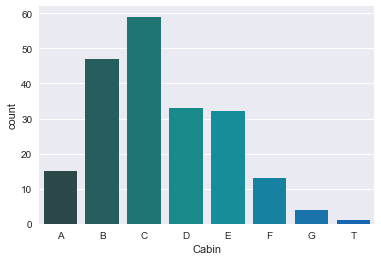

In [60]:
sns.countplot('Cabin', data=cabin_df, palette='winter_d', order=sorted(set(levels)))

In [61]:
#Tは誤ったデータのようなので、取り除く
cabin_df = cabin_df[cabin_df.Cabin !='T']

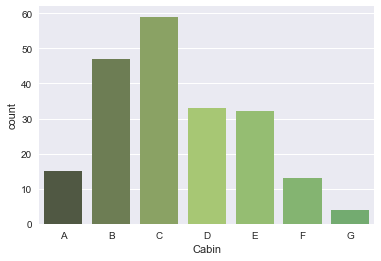

In [62]:
sns.countplot('Cabin', data=cabin_df, palette='summer_d', order=sorted(set(cabin_df.Cabin)))

乗客は主に、どこから来たのか？

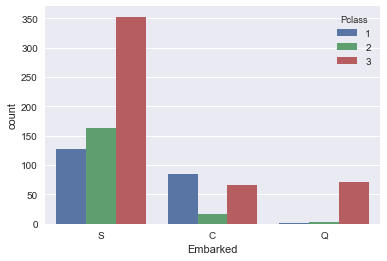

In [64]:
#乗った港ごとにプロット
sns.countplot('Embarked', data=titanic_df, hue='Pclass')

In [65]:
from collections import Counter

In [66]:
#nanがあっても描画してくれるので注意
Counter(titanic_df.Embarked)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

家族連れか？単身者か？

In [67]:
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp

In [69]:
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [70]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

C:\Users\n00476\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [71]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


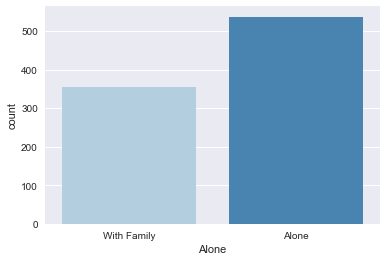

In [73]:
sns.countplot('Alone', data=titanic_df, palette='Blues')

どのよな要因が生死を分けたのか？

In [74]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

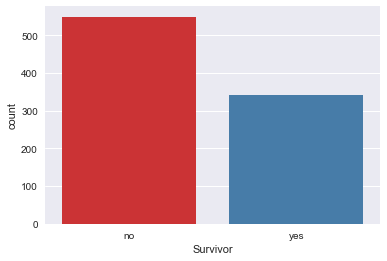

In [75]:
sns.countplot('Survivor', data=titanic_df, palette='Set1')

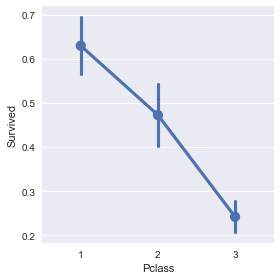

In [76]:
sns.factorplot('Pclass', 'Survived', data=titanic_df, order=[1,2,3])

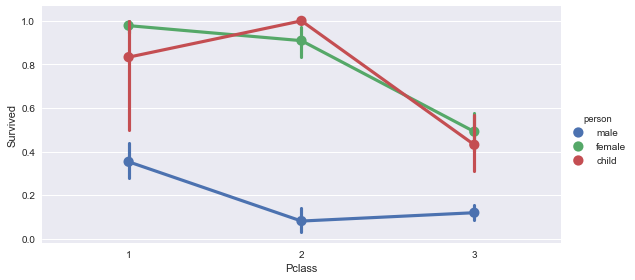

In [80]:
sns.factorplot('Pclass', 'Survived', hue='person', data=titanic_df, order=[1,2,3], aspect=2)

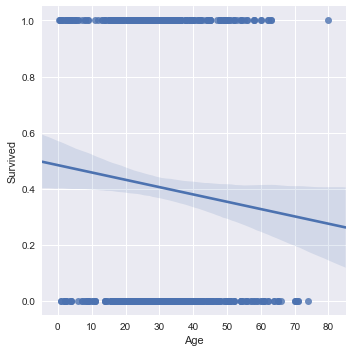

In [81]:

sns.lmplot('Age', 'Survived', data=titanic_df)

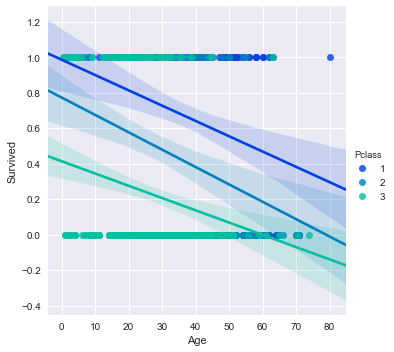

In [82]:
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter', hue_order=[1,2,3])

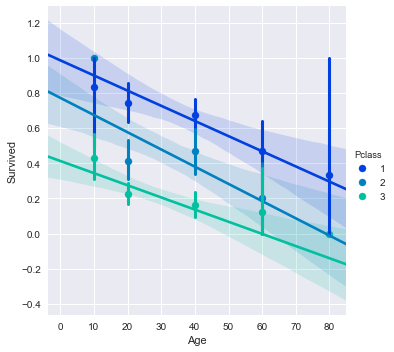

In [83]:
generations = [10,20,40,60,80]
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter', 
           hue_order=[1,2,3], x_bins=generations)

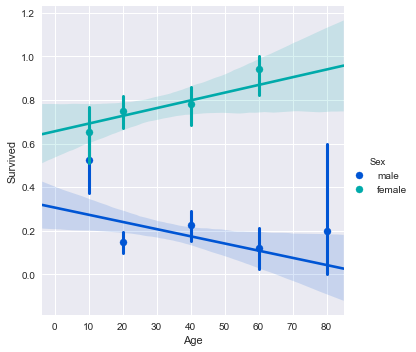

In [84]:
sns.lmplot('Age', 'Survived', hue='Sex', data=titanic_df, palette='winter', 
           x_bins=generations)

性別、年齢、客室の等級が、生存率にどう影響するのかデータを可視化することができました。

慣れてきたと思うので、以下の問いにも挑戦してみましょう。

    1.) 乗客が居たデッキは生存率と関係あるか？また、その答えは感覚的な答えと合うだろうか？
    2.) 家族連れであることは、事故からの生還率を上げているだろうか？